# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.stats as stats
import pylab

# matplotlib setup
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)

# turn edges on in plt
plt.rcParams["patch.force_edgecolor"] = True

np.random.seed(42)

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

In [5]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
# number of callbacks for black-sounding names
sum(df[df.race=='w'].call)

235.0

In [7]:
df.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### What test is appropriate for this problem? Does CLT apply?

<div class="span5 alert alert-success">
<p>There are 4869 observations, so the CLT applies. I will use the Z-test for proportions.</p>
</div>

In [9]:
# aggregate values
r = np.sum(df.call)
n = len(df)
p = r/n

w = df[df.race == 'w']
b = df[df.race == 'b']

# white-sounding names
w_r = np.sum(w.call)
w_n = len(w)
w_p = (w_r / w_n)


# black-sounding names
b_r = np.sum(b.call)
b_n = len(b)
b_p = (b_r / b_n)


data = {'CB': np.array([w_r, b_r, r]).astype(int),
        'No CB': np.array([w_n - w_r, b_n - b_r, n - r]).astype(int),
        'Total': np.array([w_n, b_n, n]).astype(int),
        '% Success': np.array(['{:.2%}'.format(w_r/w_n), '{:.2%}'.format(b_r/b_n), '{:.2%}'.format(r/n)])}

tbl = pd.DataFrame(data, columns = ['CB', 'No CB', 'Total', '% Success'], 
                   index = ['White-sounding names', 'Black-sounding names', 'Aggregate'])
tbl



,CB,No CB,Total,% Success
White-sounding names,235,2200,2435,9.65%
Black-sounding names,157,2278,2435,6.45%
Aggregate,392,4478,4870,8.05%


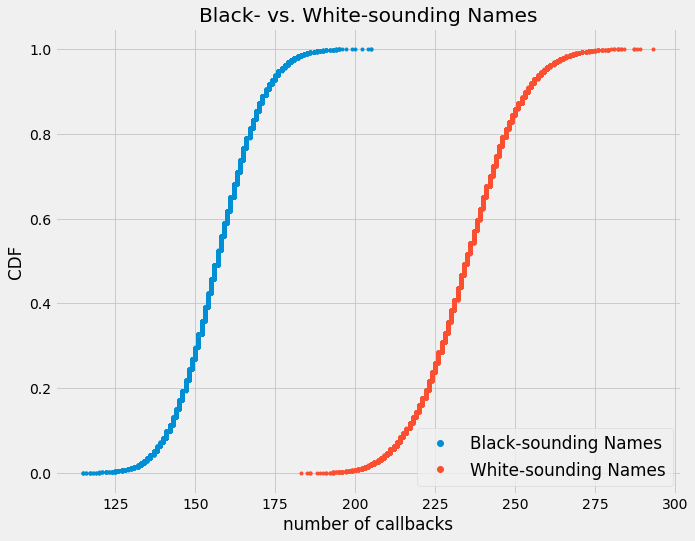

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)

# Plot CDFs of callbacks for black- vs. white-sounding names
w_samples = np.random.binomial(w_n, w_p, size=10000)
b_samples = np.random.binomial(b_n, b_p, size=10000)

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('number of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('Black- vs. White-sounding Names')
_ = plt.legend(('Black-sounding Names', 'White-sounding Names'), loc='lower right', fontsize='large', markerscale=2)

<div class="span5 alert alert-success">
<p> When sample sizes n1 and n2 are large enough and/or the proportions in each sample (p1 and p2) are close enough to 0.5, the difference between the two proportions is Normally distributed. One guideline is that all of the following conditions must hold true for this Normal approximation to be valid:

n1 ∗ p1≥5

n2 ∗ p2≥5

n1 ∗ (1−p1)≥5

n2 ∗ (1−p2)≥5

Inserting the sample data yields the following: </p>
</div>

In [12]:
r1 = w_n * w_p >= 5
r2 = b_n * b_p >= 5
r3 = w_n * (1-w_p) >= 5
r4 = b_n * (1-b_p) >= 5

print(r1,r2,r3,r4)

True True True True


<div class="span5 alert alert-success">
<p>
The tests all pass, the Normal approximation is valid and the Z-test for proportions can be used. An alternative would be resampling, which requires no approximations and can operate with small samples and extreme proportions.</p>


### Q2: What are the null and alternate hypotheses?

Null Hypothesis: the probability of success (getting a callback) is the same for both resumes with white-sounding names and black-sounding names.


Alternate Hypothesis: the probability of success IS NOT THE SAME for resumes with white-sounding names as it is for those with black-sounding names.


### Q3: p-value testing


In [14]:
def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p
    

In [15]:
# 95% confidence interval
prop_diff = w_p - b_p
print('Observed difference in proportions: \t {}\n'.format(prop_diff))

z_crit = 1.96
p_hat1 = w_p*(1-w_p)/w_n
p_hat2 =  b_p*(1-b_p)/b_n
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

z_stat, p_val = ztest_proportions_two_samples(w_r, w_n, b_r, b_n)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(moe))

Observed difference in proportions: 	 0.032032854209445585

z-stat: 	 4.108412152434346
p-value: 	 3.983886837577444e-05
95% conf int: 	 0.016777447859559147 - 0.047288260559332024
Margin of err: 	 +/-0.015255406349886438


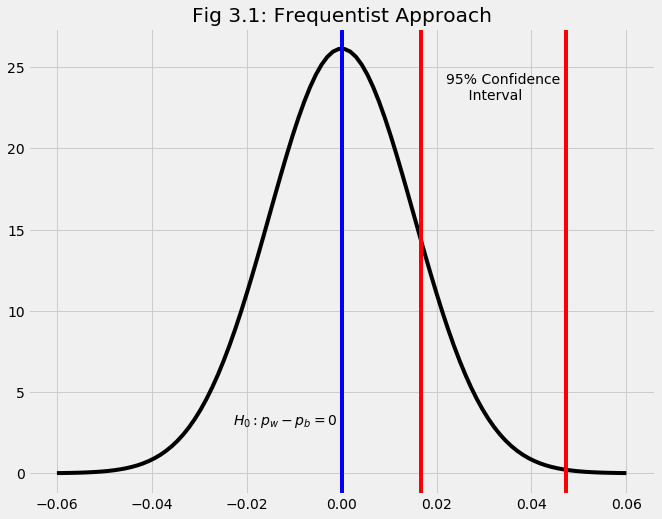

In [20]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)

# Graph the Frequentist results
x = np.linspace(- 0.06, 0.06, 100, endpoint=True)
pdf = [stats.norm.pdf(_, loc=0, scale=moe) for _ in x]
plt.plot(x, pdf, 'k-')
plt.figsize = (10, 8)

_ = plt.axvline(ci_high, color='red')
_ = plt.axvline(ci_low, color='red')
_ = plt.axvline(0, color='blue')
_ = plt.text(-0.023, 3, '$H_0: p_w - p_b = 0$')
_ = plt.text(0.022, 23, '95% Confidence \n     Interval')
_ = plt.title('Fig 3.1: Frequentist Approach');

### Bootstrap Approach

In [17]:
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(r) + [False] * int(n-r))

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=w_n))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=b_n))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/b_n
    
bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)

print('obs diff: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.032032854209445585

BOOTSTRAP RESULTS
p-value: 0.0
95% conf. int.: [-0.01520534  0.01560575]


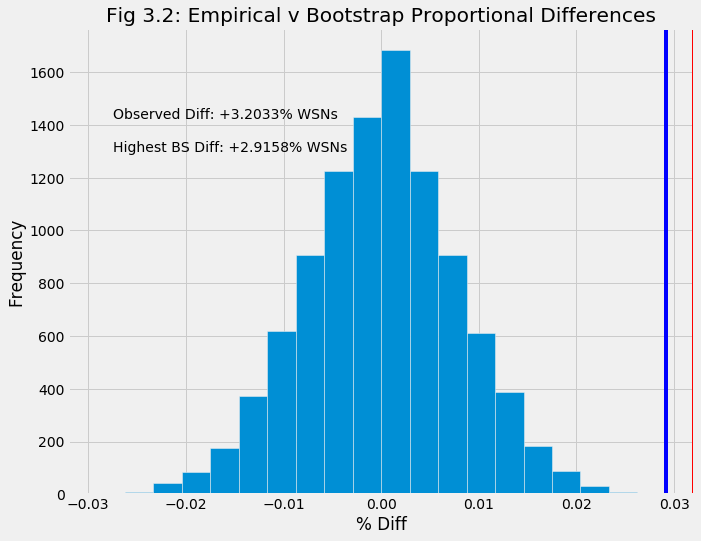

In [18]:
_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.axvline(prop_diff, color='red')
_ = plt.axvline(np.max(bs_reps_diff), color='blue')
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Fig 3.2: Empirical v Bootstrap Proportional Differences')
_ = plt.text(-0.0275, 1300, 'Observed Diff: +{:0.5}% WSNs\n\nHighest BS Diff: +{:0.5}% WSNs'.format(prop_diff*100, np.max(bs_reps_diff)*100))

<div class="span5 alert alert-success">
<p>
The p-value for the Frequentist and Boostrap approaches are both well below the p=0.05 threshold so the null hypothesis must be rejected in favor of the alternate hypothesis that perception of race based on the name on the resume does have an effect on whether an applicant will receive a callback.</p>